# Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

*NB. Согласно структуре таблицы, "одна строка" -- это не "один клиент", а "один займ". Уверен, что именно это и имелось в виду, т.к. если мы предсказываем вероятность дефолта, нам нужна именно такая таблица. (ЦЖ)* 

In [1]:
import os
import pandas as pd

In [64]:
# Путь к папке с файлами CSV

folder_path = r'../data/'

# Получение списка файлов CSV в папке
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

print(csv_files)  
# ['D_clients.csv', 'D_close_loan.csv', 'D_job.csv', 'D_last_credit.csv', 'D_loan.csv', 'D_pens.csv', 'D_salary.csv', 'D_target.csv', 'D_work.csv']

['D_clients.csv', 'D_close_loan.csv', 'D_job.csv', 'D_last_credit.csv', 'D_loan.csv', 'D_pens.csv', 'D_ready.csv', 'D_salary.csv', 'D_target.csv', 'D_work.csv']


In [65]:
# Чтение файлов CSV и создание датафреймов
dataframes = {}
for file in csv_files:
    # Получение имени файла без расширения
    file_name = os.path.splitext(file)[0]
    file_name = file_name.replace('D_', '')
#     print(file_name)
 # Создание имени датафрейма с приставкой "df_"
    dataframe_name = f"df_{file_name}"
    # Чтение файла CSV в датафрейм
    file_path = os.path.join(folder_path, file)
    df_temp = pd.read_csv(file_path)
    df_temp = df_temp.drop_duplicates()
    dataframes[dataframe_name] = df_temp

# Вывод созданных датафреймов
for dataframe_name, dataframe in dataframes.items():
    print(f"Название датафрейма: {dataframe_name}")
    print(dataframe.head(3))
    print()


Название датафрейма: df_clients
          ID  AGE  GENDER            EDUCATION      MARITAL_STATUS  \
0  106805103   42       1              Среднее  Не состоял в браке   
1  106809308   28       1  Среднее специальное      Состою в браке   
2  106805867   64       0  Среднее специальное      Состою в браке   

   CHILD_TOTAL  DEPENDANTS  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  \
0            1           0                  1                  0   
1            1           1                  1                  0   
2            2           0                  1                  1   

  REG_ADDRESS_PROVINCE FACT_ADDRESS_PROVINCE POSTAL_ADDRESS_PROVINCE  \
0   Московская область    Московская область      Московская область   
1    Читинская область     Читинская область       Читинская область   
2    Иркутская область     Иркутская область       Иркутская область   

   FL_PRESENCE_FL  OWN_AUTO  
0               1         0  
1               0         0  
2               0         1  

Назв

In [66]:
# Собираем итоговый датафрейм 
df_fin = pd.DataFrame()
df_fin[['AGREEMENT_RK', 'ID_CLIENT', 'TARGET']] = dataframes['df_target'][['AGREEMENT_RK', 'ID_CLIENT', 'TARGET']]
df_fin = df_fin.merge(dataframes['df_clients'], how='left', left_on='ID_CLIENT', right_on='ID')

print(df_fin.columns)  # посмотрим глазами 

# Index(['AGREEMENT_RK', 'ID_CLIENT', 'TARGET', 'ID', 'AGE', 'GENDER',
#        'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS',
#        'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'REG_ADDRESS_PROVINCE',
#        'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL',
#        'OWN_AUTO'],
#       dtype='object')


Index(['AGREEMENT_RK', 'ID_CLIENT', 'TARGET', 'ID', 'AGE', 'GENDER',
       'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS',
       'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'REG_ADDRESS_PROVINCE',
       'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL',
       'OWN_AUTO'],
      dtype='object')


In [67]:
# Продолжаем сбор финального датафрейма
df_fin = df_fin[['AGREEMENT_RK', 'TARGET', 'ID_CLIENT', 'AGE', 
       'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 
       'CHILD_TOTAL', 'DEPENDANTS']]
df_fin = df_fin.merge(dataframes['df_salary'], how='left', left_on='ID_CLIENT', right_on='ID_CLIENT')

# Промежуточный датафрейм с займами
df_loans = pd.merge(dataframes['df_loan'], dataframes['df_close_loan'], how='left', left_on='ID_LOAN', right_on='ID_LOAN')

# Второй промежуточный датафрейм: соединяем клиентов с займами
merged_df = df_fin.merge(df_loans, how='left', left_on='ID_CLIENT', right_on='ID_CLIENT')
# Подсчитываем общее количество займов
merged_df['LOAN_NUM_TOTAL'] = merged_df.groupby('ID_CLIENT')['ID_LOAN'].transform('count')
# Подсчитываем количество закрытых займов
merged_df['LOAN_NUM_CLOSED'] = merged_df.groupby('ID_CLIENT')['CLOSED_FL'].transform('sum')

# Сборка
df_fin = df_fin.merge(merged_df[['ID_CLIENT', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']], on='ID_CLIENT')
df_fin = df_fin[['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']]
print(df_fin.columns)  # посмотрим глазами 

# Index(['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
#        'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
#        'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED'],
#       dtype='object')

Index(['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL',
       'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
       'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED'],
      dtype='object')


In [68]:
# Сохраняем в файл 
df_fin.to_csv('../data/D_ready.csv', index=False)

*NB. По идее, здесь надо перезагрузить тетрадку, чтобы не морочиться с удалением переменных из памяти. Не знаю, насколько это хорошая практика.* 

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

In [2]:
df = pd.read_csv('../data/D_ready.csv', sep=',')
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,59910150,0,49,1,0,1,2,1,5000.0,1,1
1,59910230,0,32,1,0,1,3,3,12000.0,1,1
2,59910525,0,52,1,0,1,4,0,9000.0,2,1
3,59910525,0,52,1,0,1,4,0,9000.0,2,1
4,59910803,0,39,1,0,1,1,1,25000.0,1,1


## Гистограмма таргета 

11.29


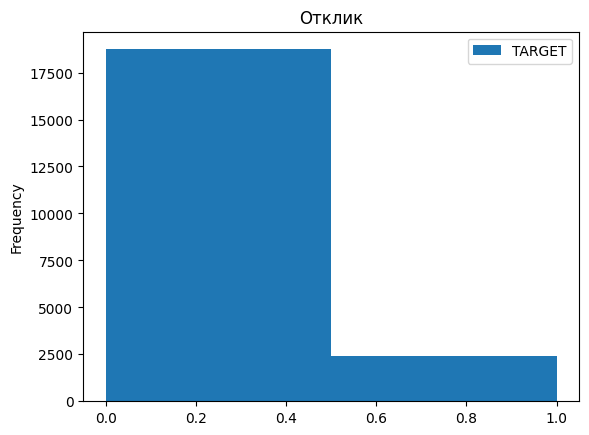

In [22]:
# df[['TARGET']].hist('TARGET', title='Отклик')

df[['TARGET']].plot(kind='hist', bins=2, title='Отклик')

print(round(len(df[df['TARGET'] == 1]) / (len(df) / 100), 2))  

<Axes: title={'center': 'Возраст'}, ylabel='Frequency'>

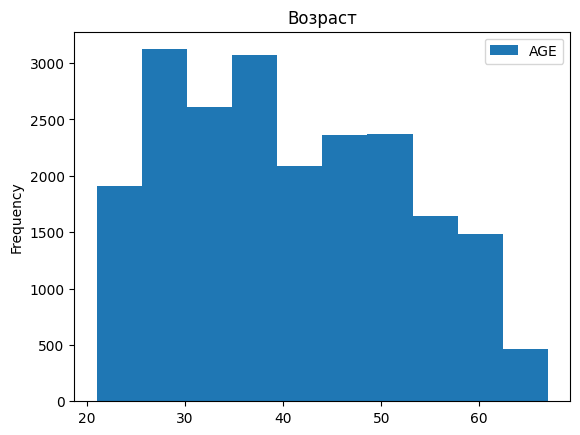

In [35]:
df[['AGE']].plot(kind='hist', title='Возраст')